# Лабороторная работа 1

## Задача о падении тела. Построение графиков функций.

## Кандидатов Егор Олегович,  26.02.2025

## Задание 1.1. Задача о падении тела

### Этап 1

In [112]:
import math
math.sin(math.pi/2)

1.0

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.constants as const
import sympy

### Этап 2

In [9]:
h_start = 1 # вертикальная составляющая положения тела в момент запуска
h_end = 3.0E+0 # вертикальная составляющая положения тела в конечный момент движ
T = 3.0 # время полета
s_end = 5.0e0 # горизонтальное перемещение тела за время полета
print(h_start, h_end)

1 3.0


In [10]:
g = const.g
g, const.unit('standard acceleration of gravity')

(9.80665, 'm s^-2')

In [11]:
# примеры констант
const.pi, const.unit('speed of light in vacuum'), const.unit('Newtonian constant of gravitation')

(3.141592653589793, 'm s^-1', 'm^3 kg^-1 s^-2')

In [12]:
step = 0.01
t_list = [0 + i*step for i in range(int(T/0.01))]
t_array = np.arange(0,T,step)

In [13]:
#?range - функция для создания последовательностей, работает только с целыми числами и на выходе возвращает итератор, используется для обычных циклов
#?np.arange - поддерживает дробные шаги, возвращает массив, используется в основном для численных вычислений

### Этап 3

Второй закон Ньютона гласит, что $$F = ma$$, где F - сила, m - масса тела, a - ускорение

В данном случае на тело действует только сила тяжести, которая направлена вниз и равна $$F=m(0,−g)$$, где g — ускорение свободного падения.

ускорение движения тела можно выразить как вторую производную $ \mathbf{a} = (s''_x(t), s''_y(t)) $

В результате получим два уравнения:$s''_x(t) = 0, \quad s''_y(t) = -g.$
Из этого уравнения и начальных условий можно записать аналитический вид для функций $ s_x(t) $ и $ s_y(t) $  
$s_x(t) = s_x(0) + v0_{x} t = 0 + v0_{x} t,$
$s_y(t) = s_y(0) + v0_{y} t - \frac{g}{2} t^2 = h_{start} + v0_{y} t - \frac{g}{2} t^2,$
где $ \mathbf{v_0} = (v0_{x}, v0_{y}) $ обозначает неизвестную скорость движения тела  
в начальный момент времени $ t = 0 $.

In [19]:
v0_x = s_end/T
v0_x

1.6666666666666667

In [20]:
v0_y = (h_end-h_start+g/2*T**2)/T
v0_y

15.376641666666666

In [21]:
alpha = math.atan(v0_y/v0_x)
alpha, math.degrees(alpha)

(1.462828312588189, 83.81388846354714)

In [22]:
f's_x(t) = {v0_x} t'

's_x(t) = 1.6666666666666667 t'

In [23]:
f's_y(t) = {h_start} + {v0_y:.6} t - {g:.6}/2*t\N{superscript two}'

's_y(t) = 1 + 15.3766 t - 9.80665/2*t²'

### Этап 4

In [25]:
t_list, t_array;

In [26]:
s_x_list = [v0_x*t for t in t_list]
s_y_list = [h_start+v0_y*t-g*t**2/2 for t in t_list]

In [27]:
s_x_array = v0_x*t_array
s_y_array = h_start+v0_y*t_array-g*t_array**2/2

(0.0, 5.0, 0.0, 14.0)

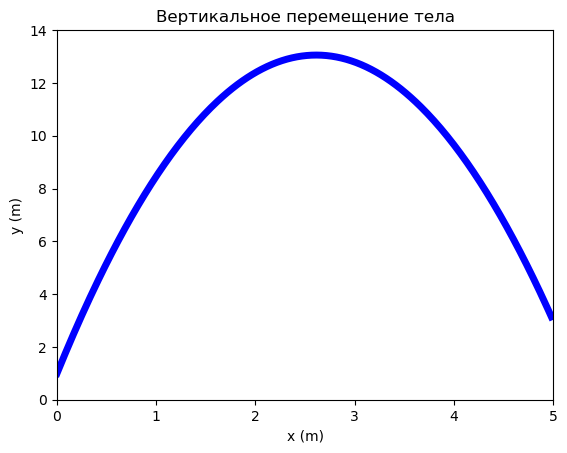

In [28]:
# со списком
plt.figure()
plt.plot(s_x_list,s_y_list,'b-',lw=5)
plt.title('Вертикальное перемещение тела')
plt.xlabel('x (m)'); plt.ylabel('y (m)')
plt.axis([0, s_end, 0, h_end+11])

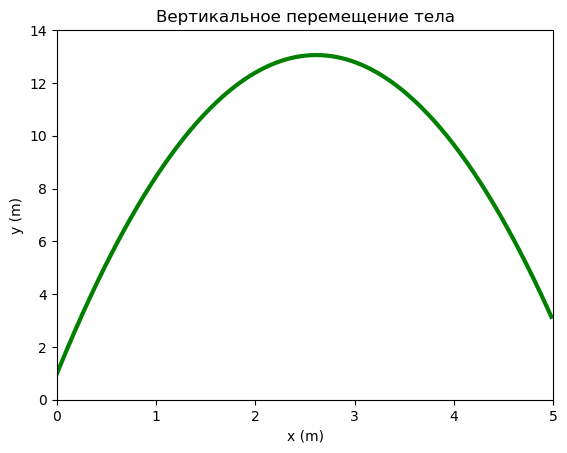

In [29]:
# С массивом 
plt.figure()
plt.plot(s_x_array, s_y_array, 'green', lw=3)
plt.title('Вертикальное перемещение тела')
plt.xlabel('x (m)'); plt.ylabel('y (m)')
plt.xlim(0, s_end)
plt.ylim(0, h_end+11);

## Задание 1.2. Определение момента времени касания телом земли

1.Рассматриваем временной отрезок [0, t_{stop}], где t_stop выбирается так, что тело уже коснулось земли.

2.Находим два соседних индекса k и k+1 , таких что:
$$s_{y}(k)*s_{y}(k+1) < 0$$
Это означает, что между точками $$(t(k), s_{y}(k)) и (t(k+1), s_{y}(k+1))$$ произошло пересечение оси.

3.Так как функция $$s_{y}(t)$$ между двумя найденными точками, то прямая, проходящая через эти две точки задается уравнением интерполяции:
$$s_{lin}(t) = s_{y}(k) + \frac{s_{y}(k+1) - s_{y}(k)}{t(k+1) - t(k)} * (t-t(k))$$, где 
$$\frac{s_{y}(k+1) - s_{y}(k)}{t(k+1) - t(k)}$$ - угловой коэффициент. Заметим, что это похоже на уравнение $$y = kx + b$$

4.Для вычисления "t*" подставим 0 вместо s_{lin}(t) и получим формулу для t*

$$t* = t(k) - (s_{y}(k) * \frac{t(k+1) - t(k)}{ s_{y}(k+1) - s_{y}(k)}$$

t_{exact}— это точное время, когда тело касается земли, полученное аналитически. Оно находится путем решения уравнения 
s_{y}(t)=0 с использованием точной формулы для движения тела. В отличие от приближенного метода (линейной интерполяции), который аппроксимирует t*, точное значение t_{exact} определяется без численных допущений.

Относительная ошибка приближенного метода вычисляется по формуле: $$\frac{|t^* - t_{exact}|}{t_{exact}} * 100% $$

### Этап 1

In [39]:
t = sympy.symbols('t')
result = sympy.solve(h_start+v0_y*t-g*t**2/2, t)
result

[-0.0637382309488101, 3.19970039267921]

In [40]:
t_star_exact = result[-1]
t_star_exact

3.19970039267921

Функция symbols используется, чтобы создавать символьные переменные, которые используются для решения математических выражений. Функция solve используется для решения алгебраических уравнений или систем уравнений.

**Пример 1**

In [43]:
# x = sympy.symbols('x')
# answer = sympy.solve(x**2 - 4, x)
# answer

**Пример 2**

In [45]:
# x = sympy.symbols('x')
# equation = 2*x + 5 - 13
# solution = sympy.solve(equation, x)
# solution

In [46]:
t_list = [0 + i*step for i in range(int(1.4 * T / step))]
s_y = [h_start+v0_y*t-g*t**2/2 for t in t_list]
for k,y in enumerate(s_y):
    if(y < 0):
        coordinates_x = [(k-1)*step, k*step]
        coordinates_y = [s_y[k-1], y]
        
        break;

Text(0.5, 1.0, 'Касание телом земли')

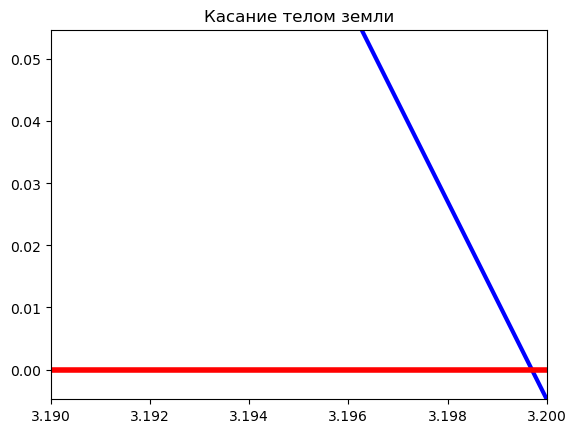

In [47]:
plt.figure()
plt.plot(coordinates_x, coordinates_y, 'b-', lw = 3)
plt.plot(coordinates_x, [0, 0], 'red', lw = 4)
plt.axis([3.19, 3.200, coordinates_y[1], coordinates_y[0] - 0.1])
plt.title('Касание телом земли')

Найдем угловой коэффициент $$k = \frac{y2-y1}{x2-x1}$$

In [49]:
k = (coordinates_y[1] - coordinates_y[0]) / (coordinates_x[1] - coordinates_x[0])

Найдем $$b = y - kx$$

In [51]:
b = coordinates_y[1] - k*coordinates_x[1]
b

51.053141600000245

Найдем точку пересечения с осью х

In [53]:
x0 = -b/k
x0

3.1996994995400283

In [54]:
mistake = (abs(x0 - t_star_exact)) / t_star_exact * 100
print("mistake =", mistake)

mistake = 2.79132127839983e-5


## Задание 1.3. Построение секущей, касательной и нормали к графику функции 

In [56]:
p_start = np.array([s_x_array[0],s_y_array[0]])
p_end = np.array([s_x_array[-1],s_y_array[-1]])
p_start, p_end

(array([0., 1.]), array([4.98333333, 3.13994275]))

In [57]:
a = p_end - p_start
a

array([4.98333333, 2.13994275])

In [58]:
p = [p_start + a*t for t in [-1, 2]]
p = np.array(p)

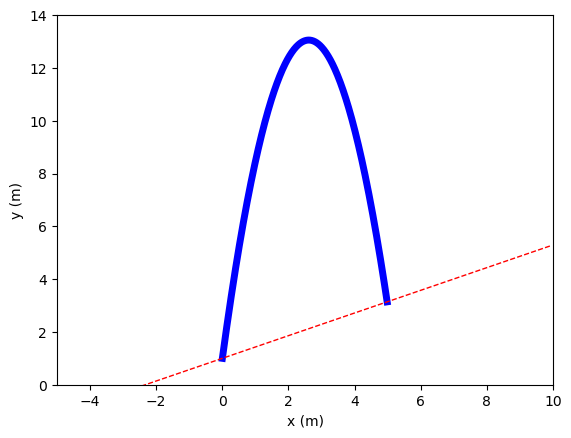

In [59]:
fig = plt.figure()
plt.plot(s_x_array,s_y_array,'b-',lw=5)
plt.plot(p[:,0],p[:,1],'--',color='red',lw=1)
plt.xlabel('x (m)'); plt.ylabel('y (m)')
plt.axis([-5, s_end+5, 0, h_end+11]);

Угловой коэффициент k определяем, как tg(alpha) = f'(x) = dy/dx, k0 = v0_y - g*t_array[0] - в начале t = 0

In [61]:
k0 = v0_y - g*t_array[0]
x_array = np.arange(-1, T, 0.001)
y0_array = k0 * x_array + h_start

Для того, чтобы найти нормальную прямую, нужно вспомнить свойство из геометрии, что k0 * k1 = -1

In [63]:
k1 = -1 / k0
k1

-0.06503370642809413

Уравнение нормальной прямой

In [65]:
y1_array = k1 * x_array + h_start

Строим график

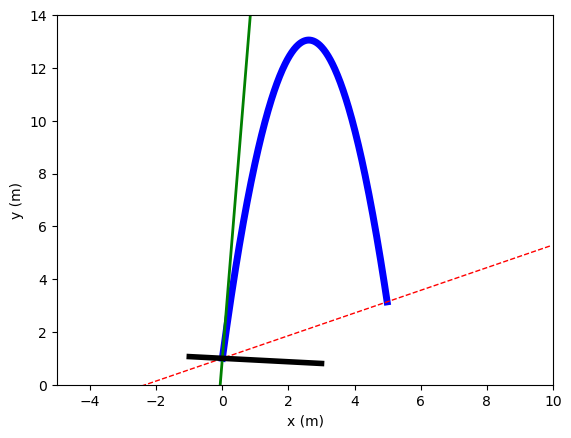

In [67]:
fig = plt.figure()
plt.plot(s_x_array,s_y_array,'b-',lw=5)
plt.plot(p[:,0],p[:,1],'--',color='red',lw=1)
plt.plot(x_array, y0_array, 'g', lw=2)
plt.plot(x_array, y1_array, 'black', lw=4)
plt.xlabel('x (m)'); plt.ylabel('y (m)')
plt.axis([-5, s_end+5, 0, h_end+11]);

## Задание 1.4. Построение графиков функций

### Вариант 5

a - амплитуда, которая определяет размер розы, она может быть любым действительным числом, гл для нашего кдобства возьмем a = 1

Обычно для розы берут диапазон углов 2pi*n

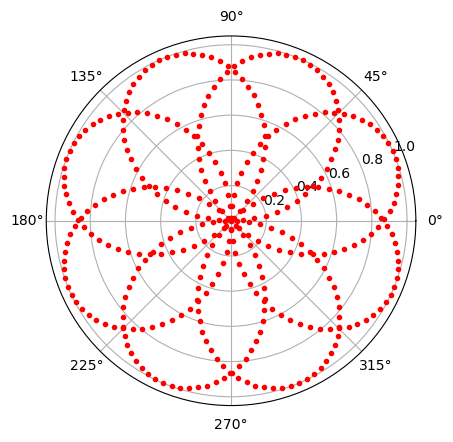

In [72]:
a = 1
m = 4
n = 3
plt.figure()
plt.axes(projection='polar')
phi = np.arange(0, np.pi*2*n, 0.05)
r = a * np.sin((m / n) * phi)
plt.plot(phi+(r<0)*np.pi, abs(r), 'r.')

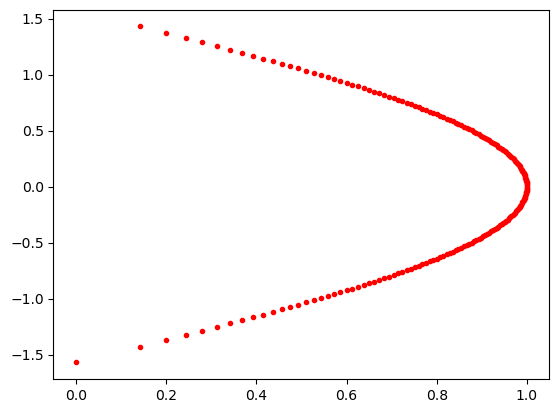

In [73]:
t = np.arange(0, 2, 0.01)
x = np.sqrt(2 * t - t**2)
y = np.arcsin(t - 1)
plt.figure()
plt.plot(x, y, 'r.')